In [8]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic")
model = AutoModelForSequenceClassification.from_pretrained("asafaya/bert-mini-arabic")

# Read the CSV file
df = pd.read_csv('Bishri_output.csv')  # Replace with the path to your CSV file

# Specify the target words
target_words = ['قومي', 'قومية']  # Replace with your target words

# Perform sentiment analysis for specific words
results = []

for index, row in df.iterrows():
    text = row['Text']  # Replace 'column_name' with the actual column name containing text data

    # Check if any of the target words are in the text
    if any(target_word in text for target_word in target_words):
        # Preprocess the text
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Perform sentiment analysis inference
        outputs = model(**inputs)

        # Access the logits correctly for classification
        logits = outputs.logits

        # Find the class with the highest score
        predicted_class = torch.argmax(logits, dim=1).item()

        # Define your sentiment labels based on the model's configuration
        sentiment_labels = model.config.id2label

        # Map the predicted class to the corresponding sentiment label
        predicted_sentiment = sentiment_labels[predicted_class]

        # Store the results
        results.append({'Index': index, 'Text': text, 'Predicted Sentiment': predicted_sentiment})

# Create a DataFrame from the results
sentiment_results_df = pd.DataFrame(results)

# Save the results to a CSV file (optional)
sentiment_results_df.to_csv('Bishri_SA.csv', index=False)  # Change the filename as needed


Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-mini-ar

In [11]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic")
model = AutoModelForSequenceClassification.from_pretrained("asafaya/bert-mini-arabic")

# Read the CSV file
df = pd.read_csv('Bishri_output.csv')  # Replace with the path to your CSV file

# Specify the target words
target_words = ['قومي', 'قومية']  # Replace with your target words

# Define the mapping from model labels to human-readable sentiment labels
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive',
}

# Perform sentiment analysis for specific words
results = []

for index, row in df.iterrows():
    text = row['Text']  # Replace 'column_name' with the actual column name containing text data

    # Check if any of the target words are in the text
    if any(target_word in text for target_word in target_words):
        # Preprocess the text
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Perform sentiment analysis inference
        outputs = model(**inputs)

        # Access the logits correctly for classification
        logits = outputs.logits

        # Find the class with the highest score
        predicted_class = torch.argmax(logits, dim=1).item()

        # Map the predicted class label to the corresponding sentiment label
        predicted_sentiment = label_mapping[model.config.id2label[predicted_class]]

        # Store the results
        results.append({'Index': index, 'Text': text, 'Predicted Sentiment': predicted_sentiment})

# Create a DataFrame from the results
sentiment_results_df = pd.DataFrame(results)

# Save the results to a CSV file (optional)
sentiment_results_df.to_csv('Bishri_SA.csv', index=False)  # Change the filename as needed


Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-mini-ar

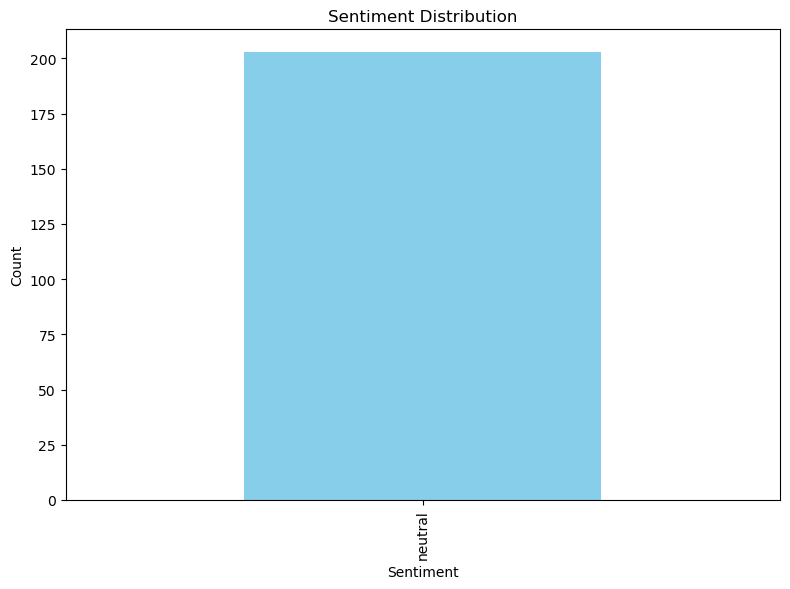

In [13]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic")
model = AutoModelForSequenceClassification.from_pretrained("asafaya/bert-mini-arabic")

# Read the CSV file
df = pd.read_csv('Bishri_output.csv')  # Replace with the path to your CSV file

# Specify the target words
target_words = ['قومي', 'قومية']  # Replace with your target words

# Perform sentiment analysis for specific words
results = []

for index, row in df.iterrows():
    text = row['Text']  # Replace 'column_name' with the actual column name containing text data

    # Check if any of the target words are in the text
    if any(target_word in text for target_word in target_words):
        # Preprocess the text
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

        # Perform sentiment analysis inference
        outputs = model(**inputs)

        # Access the logits correctly for classification
        logits = outputs.logits

        # Calculate sentiment scores from logits
        sentiment_scores = torch.softmax(logits, dim=1).tolist()[0]

        # Store the results
        results.append({'Index': index, 'Text': text, 'Sentiment Scores': sentiment_scores})

# Create a DataFrame from the results
sentiment_results_df = pd.DataFrame(results)

# Save the results to a CSV file (optional)
sentiment_results_df.to_csv('Bishri_SA_Scores.csv', index=False)  # Change the filename as needed


Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-mini-ar

In [14]:
# Visualize the distribution of sentiments
sentiment_counts = sentiment_results_df['Predicted Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'Predicted Sentiment'